In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Read that data into Python and call the dataframe churnData
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
#Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. 
#Convert this column into numeric type using pd.to_numeric function

churnData.dtypes
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
# Check for null values in the DataFrame
print(churnData.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
# Replace null values
# fill the NaN elements with mean
churnData.fillna(churnData['TotalCharges'].mean(), inplace=True)

# Check for null values in the DataFrame again
print(churnData.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# Select the features and target variable
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

In [8]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [9]:
# Scale the features
trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

# Logistic Regression

In [18]:
model = LogisticRegression() 

model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

In [19]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_log),
                                          precision_score(y_train_np, y_pred_train_log, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_log, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_log),
                                         precision_score(y_test_np, y_pred_test_log, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_log, pos_label='Yes')]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.788427,0.801987
1,Precision,0.644444,0.692607
2,Recall,0.447351,0.470899


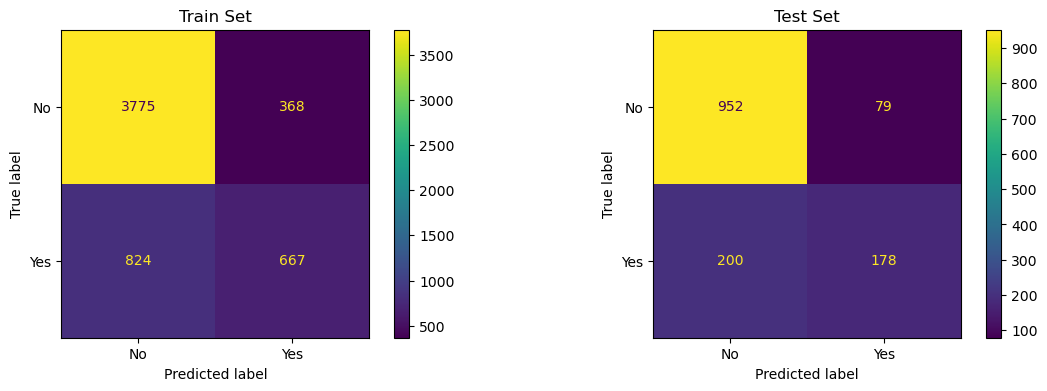

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_log)
cm_test = confusion_matrix(y_test_np, y_pred_test_log)

ConfusionMatrixDisplay(cm_train, display_labels=model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

# Knn Classifier Model

In [21]:
knn_model = KNeighborsClassifier(n_neighbors = 12, weights = 'uniform') 
knn_model.fit(X_train, y_train) 

y_pred = knn_model.predict(X_test) 

y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [22]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_knn),
                                          precision_score(y_train_np, y_pred_train_knn, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_knn, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_knn),
                                         precision_score(y_test_np, y_pred_test_knn, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_knn, pos_label='Yes')]})

display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,0.808307,0.784244
1,Precision,0.757842,0.694737
2,Recall,0.405097,0.349206


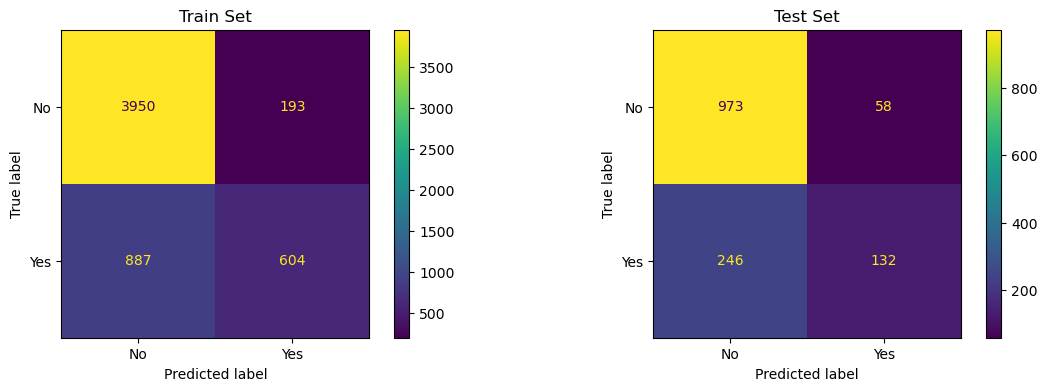

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_knn)
cm_test = confusion_matrix(y_test_np, y_pred_test_knn)

ConfusionMatrixDisplay(cm_train, display_labels=model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

# Comparing KNN and Logistic Regression Models

In [12]:
# Fit a Decision Tree Classifier on the training data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# Predict the labels on the test data
y_pred = dtc.predict(X_test)

In [14]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7274662881476224
